In [5]:
import numpy as np
import pandas as pd

# нужно разбить цены на данные классы - тут мы разбиваем (гы)
classes =  [(0, 500),
            (500, 6000)]

dataset = pd.read_csv('resources/new_mobile.csv', sep=',')
price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories
# берём только те колонки которые извлекли в 4 лабе
dataset = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны', 'Категория цены']]

C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

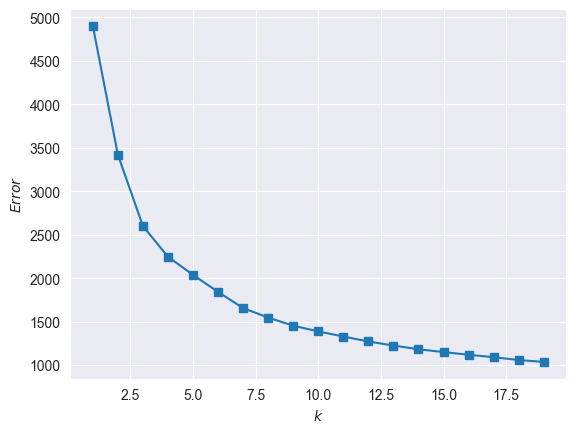

In [7]:
from sklearn.cluster import KMeans # подключаем KMeans кластеризацию
import matplotlib.pyplot as plt


X = dataset[dataset.columns.drop(labels='Категория цены')]
Y = dataset[['Категория цены']]
inertia = [] # здесь будем накапливать ошибки
for k in range(1, 20): #
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X) # создаем и обучаем кластеризатор с заданным числом кластеров
    inertia.append(np.sqrt(kmeans.inertia_)) # смотрим на ошибку, добавляем ее в историю

plt.plot(range(1, 20), inertia, marker='s') # строим график ошибки
plt.xlabel('$k$') #
plt.ylabel('$Error$'); #

C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[4.68609539e+00 6.38415521e+01 1.16257074e+02 8.02829426e+00
  3.64591754e-01]
 [3.89335846e+00 5.58751766e+01 6.06646255e+01 2.81017428e+00
  2.87800283e-01]
 [1.05587097e+01 3.36329032e+02 1.00090323e+02 1.82387097e+01
  3.22580645e+00]
 [2.39452320e+00 1.96881443e+01 9.90850515e+00 1.51288660e+00
  1.00515464e-01]]


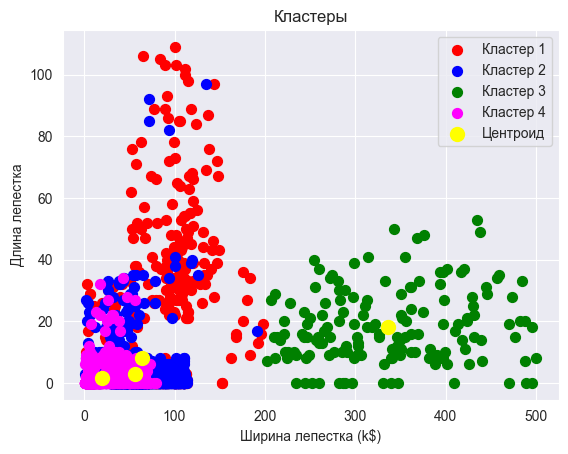

In [24]:
# настройка K-Means
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров
print(kmeans.cluster_centers_)

# визуализация кластеров
plt.scatter(X[y_kmeans == 0]['Звонков днем за месяц'], X[y_kmeans == 0]['Звонков ночью за месяц'], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1]['Звонков днем за месяц'], X[y_kmeans == 1]['Звонков ночью за месяц'], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(X[y_kmeans == 2]['Звонков днем за месяц'], X[y_kmeans == 2]['Звонков ночью за месяц'], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(X[y_kmeans == 3]['Звонков днем за месяц'], X[y_kmeans == 3]['Звонков ночью за месяц'], s = 50, c = 'magenta', label = 'Кластер 4')
plt.scatter(kmeans.cluster_centers_[:4, 1], kmeans.cluster_centers_[:4, 3], s = 100, c = 'yellow', label =
'Центроид')
plt.title('Кластеры')
plt.xlabel('Ширина лепестка (k$)')
plt.ylabel('Длина лепестка')
plt.legend(loc='best')
plt.show()